# import libraries

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# functions

In [2]:
def status_check(url):
    import requests
    r=requests.get(url)
    if r.status_code<300:
        print("request was successful")
    elif r.status_code>=400 and r.status_code<500:
        print('request failed because it is non-existant or forbidden')
    else: print('blablabla')
    return r

In [3]:
def get_soup(url):
    r=status_check(url)
    soup = BeautifulSoup(r.content)
    return soup

- get all the values from the "table" (MARQUE ,TAILLE, ÉTAT, COULEUR, NOMBRE DE VUES , INTERESSEES)

In [4]:
def get_table(soup):
    if len(soup.select("div.details-list__item-title:contains('Marque')+div"))!=0:
        brand=soup.select("div.details-list__item-title:contains('Marque')+div")[0].text.replace('\n','')
    else: 
        brand=''
    if len(soup.select("div.details-list__item-title:contains('Taille')+div"))!=0:
        size=soup.select("div.details-list__item-title:contains('Taille')+div")[0].text.replace('\n','')
    else:
        size=''
    if len(soup.select("div.details-list__item-title:contains('tat')+div"))!=0:
        cond=soup.select("div.details-list__item-title:contains('tat')+div")[0].text.replace('\n','')
    else:
        cond=''
    if len(soup.select("div.details-list__item-title:contains('Couleur')+div"))!=0:
        colors=soup.select("div.details-list__item-title:contains('Couleur')+div")[0].text.replace('\n','')
    else:
        colors=''
    if len(soup.select("div.details-list__item-title:contains('vu')+div"))!=0:
        views=soup.select("div.details-list__item-title:contains('vu')+div")[0].text.replace('\n','')
    else:
        views=''
    if len(soup.select("div.details-list__item-title:contains('ress')+div"))!=0:
        interested=soup.select("div.details-list__item-title:contains('ress')+div")[0].text.replace('\n','')
    else:
        interested=''
    lst_table=[brand, size, cond, colors, views, interested]
    return lst_table

- get the time when the article has been uploaded on vinted and the time the seller was last seen

In [5]:
def get_time(soup):
    lst_time=soup.find_all('time')
    lst_time=[elem['title'] for elem in lst_time]
    return lst_time

- get the saling price

In [6]:
def get_price(soup):
    lst_price=soup.find_all('div',{'class':'c-text--heading c-text--left c-text'})
    lst_price=[elem.text for elem in lst_price]
    return lst_price

- get the number of evaluations

In [7]:
def get_eval(soup):
    lst_eval=soup.select('div.c-rating__label>div')
    lst_eval=[elem.text for elem in lst_eval]
    return lst_eval


- get the number of stars in evaluation

In [8]:
def get_stars(soup):
    full_stars=soup.select('div.c-rating__star.c-rating__star--full')
    half_stars=soup.select('div.c-rating__star.c-rating__star--half-full')
    return [len(full_stars)+len(half_stars)/2]

- get the article title and description

In [9]:
def get_info(soup):
    import re
    lst_info=soup.find_all("div", {'class':'details-list details-list--info'})
    test=lst_info[0].text.replace('\n','')
    content=re.findall('"content":{(.*?)}',test)
    title=re.findall('"title":"(.*?)"',content[0])
    description=re.findall('"description":"(.*)?"',content[0])
    return [title[0],description[0]]

- get the number of pictures

In [10]:
def get_nb_images(soup):
    lst_images=soup.select("figure.item-description")
    return [len(lst_images)]

- get the list of urls of products

In [11]:
def get_urls(url):
    soup = get_soup(url)
    lst=soup.select('a.media__image-wrapper')
    lst_url=['https://www.vinted.fr'+elem['href']for elem in lst]
    return lst_url

- now we loop through all pages of product search to get the urls of each product and then loop through the list of urls to get the informations for each product

In [ ]:
i=1
ll=[]
url_pattern='https://www.vinted.fr/femmes/baskets?size_id[]=58&page={}&search_text=stan%20smith&color_id[]=12&status[]=2&status[]=1&status[]=6&brand_id[]=14'
while True:
    print('page:',i)
    lst_urls = get_urls(url_pattern.format(i))
    if lst_urls==[]:
        break
    i+=1
    for url in lst_urls:
        row = [url]
        soup = get_soup(url)
        row.extend(get_table(soup))
        row.extend(get_time(soup))
        row.extend(get_price(soup))
        row.extend(get_eval(soup))
        row.extend(get_stars(soup))
        row.extend(get_info(soup))
        row.extend(get_nb_images(soup))
        ll.append(row)
        time.sleep(0.5)

In [13]:
df=pd.DataFrame(ll)

In [14]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,https://www.vinted.fr/femmes/baskets-baskets/3...,Adidas Suivre,38,"Neuf, avec étiquette","noir, blanc",42,,16/01/2020 15:49,16/01/2020 15:44,"179,00 €",10,5.0,Adidas Stan Smith Mickey Mouse - Taille 38 2/3,"\u2022jamais porté \n\u2022nouveau, toujours d...",6
1,https://www.vinted.fr/femmes/baskets-baskets/1...,Adidas Suivre,38,Très bon état,"noir, blanc",348,27 utilisateurs,15/11/2018 20:35,16/01/2020 16:34,"60,00 €",7,5.0,Adidas Stan Smith,Adidas Stan Smith\nExcellent état car porté un...,3
2,https://www.vinted.fr/femmes/chuck-taylor-conv...,Adidas Suivre,38,Très bon état,"blanc, marine",11,,16/01/2020 16:24,16/01/2020 16:19,"40,00 €",Pas encore d'évaluation,0.0,Basket adidas Stan Smith,Neuf 👍basket blanche et marine adidas Stan Smi...,3
3,https://www.vinted.fr/femmes/baskets-baskets/3...,Adidas Suivre,38,Neuf,"blanc, multicolore",8,,16/01/2020 16:24,16/01/2020 15:31,"50,00 €",114,5.0,Stan Smith,Neuves jamais portées,4
4,https://www.vinted.fr/femmes/baskets-baskets/3...,Adidas Suivre,38,"Neuf, avec étiquette","rose, blanc",607,15 utilisateurs,10/01/2020 11:28,16/01/2020 16:27,"48,00 €",21,5.0,Chaussures Femmes,Paire de chaussures Adidas Stan Smith BZ0115 P...,5


In [15]:
df.columns=['Url','Brand','Size','Condition','Colors','Views','Interested','Uploaded','Last_seen','Price','Nb_evals','Stars','Title', 'Description','Nb_pictures' ]

In [16]:
df.head()

,Url,Brand,Size,Condition,Colors,Views,Interested,Uploaded,Last_seen,Price,Nb_evals,Stars,Title,Description,Nb_pictures
0,https://www.vinted.fr/femmes/baskets-baskets/3...,Adidas Suivre,38,"Neuf, avec étiquette","noir, blanc",42,,16/01/2020 15:49,16/01/2020 15:44,"179,00 €",10,5.0,Adidas Stan Smith Mickey Mouse - Taille 38 2/3,"\u2022jamais porté \n\u2022nouveau, toujours d...",6
1,https://www.vinted.fr/femmes/baskets-baskets/1...,Adidas Suivre,38,Très bon état,"noir, blanc",348,27 utilisateurs,15/11/2018 20:35,16/01/2020 16:34,"60,00 €",7,5.0,Adidas Stan Smith,Adidas Stan Smith\nExcellent état car porté un...,3
2,https://www.vinted.fr/femmes/chuck-taylor-conv...,Adidas Suivre,38,Très bon état,"blanc, marine",11,,16/01/2020 16:24,16/01/2020 16:19,"40,00 €",Pas encore d'évaluation,0.0,Basket adidas Stan Smith,Neuf 👍basket blanche et marine adidas Stan Smi...,3
3,https://www.vinted.fr/femmes/baskets-baskets/3...,Adidas Suivre,38,Neuf,"blanc, multicolore",8,,16/01/2020 16:24,16/01/2020 15:31,"50,00 €",114,5.0,Stan Smith,Neuves jamais portées,4
4,https://www.vinted.fr/femmes/baskets-baskets/3...,Adidas Suivre,38,"Neuf, avec étiquette","rose, blanc",607,15 utilisateurs,10/01/2020 11:28,16/01/2020 16:27,"48,00 €",21,5.0,Chaussures Femmes,Paire de chaussures Adidas Stan Smith BZ0115 P...,5


In [17]:
df.to_csv('Vinted_messy.csv', index=False)

In [18]:
df.shape

(583, 15)

# Cleaning

In [19]:
import re

In [22]:
df1=df.copy()

In [23]:
df1.Brand.head()

0    Adidas   Suivre
1    Adidas   Suivre
2    Adidas   Suivre
3    Adidas   Suivre
4    Adidas   Suivre
Name: Brand, dtype: object

In [24]:
df1.Brand=df.Brand.apply(lambda x: x.replace('Suivre','').strip())

In [25]:
df1.Brand.head()

0    Adidas
1    Adidas
2    Adidas
3    Adidas
4    Adidas
Name: Brand, dtype: object

In [26]:
df1.Price.head()

0    179,00 €
1     60,00 €
2     40,00 €
3     50,00 €
4     48,00 €
Name: Price, dtype: object

In [27]:
df1.Price=df1.Price.apply(lambda x: x.replace(',','.').replace('€','')).astype(float)

In [28]:
df1.Price.head()

0    179.0
1     60.0
2     40.0
3     50.0
4     48.0
Name: Price, dtype: float64

In [29]:
df1.Views.head()

0     42
1    348
2     11
3      8
4    607
Name: Views, dtype: object

In [30]:
df1.Views=df1.Views.astype(int)

In [31]:
df1.Views.head()

0     42
1    348
2     11
3      8
4    607
Name: Views, dtype: int32

In [32]:
df1.Nb_evals.value_counts().head()

Pas encore d'évaluation     87
1                           33
5                           22
3                           18
4                           17
Name: Nb_evals, dtype: int64

In [33]:
df1.Nb_evals=df1.Nb_evals.apply(lambda x: int(x) if x.isdigit() else 0)

In [34]:
df1.Interested.head()

0                         
1        27 utilisateurs  
2                         
3                         
4        15 utilisateurs  
Name: Interested, dtype: object

In [35]:
df1.Interested[3]

''

In [36]:
df1.Interested.value_counts().head()

                        171
    1 utilisateur       112
    2 utilisateurs       61
    3 utilisateurs       54
    4 utilisateurs       37
Name: Interested, dtype: int64

In [37]:
df1.Interested=df1.Interested.apply(lambda x: int(x[:-14]) if x!='' else 0) 

In [38]:
df1.Interested.head()

0     0
1    27
2     0
3     0
4    15
Name: Interested, dtype: int64

In [39]:
df1.Title.sample(15)

533                                          Stan smith 
58                                            Stan smith
443                                    Stan smith neuves
508    Stan smith Pharell Williams noires avec poids ...
398                  Adidas Stan smith grise et blanche 
278                        Stan smith fluo a la lumière 
293               Stan smith adidas blanches et rouge 38
329                                      Stan smith rose
356                                 Stan smith à motifs 
346                                           Stan smith
448                                     stan smith noir 
485                           Stan smith rouge framboise
568                              Stan Smith blanche/bleu
44                               Stan Smith Nuud blanche
22                  Adidas stan smith blanches et vertes
Name: Title, dtype: object

In [40]:
df1.Title=df1.Title.str.strip().str.lower()

In [41]:
trans_dict={"à": "a", "â":"a", "é": "e", "è" : "e", "ë": "e", "ê": "e", "î":"i","ö":"o", "ô":"o","û":"u","ù":"u"}
trans_table="àâéèëêîöôûù".maketrans(trans_dict)

In [42]:
df1.Title=df1.Title.str.translate(trans_table)

In [43]:
df1.Description.head(15)

0     \u2022jamais porté \n\u2022nouveau, toujours d...
1     Adidas Stan Smith\nExcellent état car porté un...
2     Neuf 👍basket blanche et marine adidas Stan Smi...
3                                 Neuves jamais portées
4     Paire de chaussures Adidas Stan Smith BZ0115 P...
5                                       Mise deux fois.
6     basket Stan smith acheté y\u2019a 6mois porté ...
7             portées quelques fois mais encore propres
8     baskets Adidas Stan smith authentique  neuve a...
9     Vends paire de Stan Smith Snakeskin grise édit...
10          Trés peu porté\nEnvoi en colissimo pour 5 e
11                               Selling my stan smith 
12        Paire toute neuve jamais portée \nTaille 38\n
13    superbe adidas édition limitée\nnoir à pois bl...
14                             Adidas Stan Smith neuve 
Name: Description, dtype: object

In [44]:
df1.Description=df1.Description.str.replace(r'\\n',' ').str.strip().str.lower().str.translate(trans_table).apply(lambda x: bytes(x,encoding='utf8').decode('unicode_escape'))

In [45]:
df1.Description.head(15)

0     •jamais porte  •nouveau, toujours dans la boit...
1     adidas stan smith excellent etat car porte une...
2     neuf ðbasket blanche et marine adidas stan ...
3                                 neuves jamais portees
4     paire de chaussures adidas stan smith bz0115 p...
5                                       mise deux fois.
6     basket stan smith achete y’a 6mois porte une s...
7             portees quelques fois mais encore propres
8     baskets adidas stan smith authentique  neuve a...
9     vends paire de stan smith snakeskin grise edit...
10           tres peu porte envoi en colissimo pour 5 e
11                                selling my stan smith
12           paire toute neuve jamais portee  taille 38
13    superbe adidas edition limitee noir a pois bla...
14                              adidas stan smith neuve
Name: Description, dtype: object

In [46]:
df1.Condition.head()

0    Neuf, avec étiquette
1           Très bon état
2           Très bon état
3                    Neuf
4    Neuf, avec étiquette
Name: Condition, dtype: object

In [47]:
df1.Condition=df1.Condition.str.replace(',','').str.lower().str.translate(trans_table)

In [48]:
df1.Condition.head()

0    neuf avec etiquette
1          tres bon etat
2          tres bon etat
3                   neuf
4    neuf avec etiquette
Name: Condition, dtype: object

In [49]:
df1.Colors.head()

0           noir, blanc
1           noir, blanc
2         blanc, marine
3    blanc, multicolore
4           rose, blanc
Name: Colors, dtype: object

In [50]:
df1.Colors=df1.Colors.str.split(',')

In [51]:
df1.Colors=df1.Colors.apply(lambda l: [x.strip().translate(trans_table).replace(' ','_') for x in l])

In [52]:
df1.Colors.head()

0           [noir, blanc]
1           [noir, blanc]
2         [blanc, marine]
3    [blanc, multicolore]
4           [rose, blanc]
Name: Colors, dtype: object

- now we want to get 1 column per color, so that we can filter by color if needed

In [53]:
from itertools import chain
colors = list(set(chain.from_iterable(df1.Colors)))

In [54]:
colors

['argente',
 'gris',
 'menthe',
 'rose',
 'violet',
 'corail',
 'bordeaux',
 'rouge',
 'marine',
 'beige',
 'turquoise',
 'dore',
 'kaki',
 'noir',
 'blanc',
 'orange',
 'creme',
 'jaune',
 'bleu_clair',
 'bleu',
 'multicolore',
 'vert_fonce',
 'marron',
 'vert']

In [55]:
for c in colors:
    df1['color_'+c]=df1.Colors.apply(lambda x: 1 if c in x else 0)

In [56]:
df1.head()

,Url,Brand,Size,Condition,Colors,Views,Interested,Uploaded,Last_seen,Price,...,color_blanc,color_orange,color_creme,color_jaune,color_bleu_clair,color_bleu,color_multicolore,color_vert_fonce,color_marron,color_vert
0,https://www.vinted.fr/femmes/baskets-baskets/3...,Adidas,38,neuf avec etiquette,"[noir, blanc]",42,0,16/01/2020 15:49,16/01/2020 15:44,179.0,...,1,0,0,0,0,0,0,0,0,0
1,https://www.vinted.fr/femmes/baskets-baskets/1...,Adidas,38,tres bon etat,"[noir, blanc]",348,27,15/11/2018 20:35,16/01/2020 16:34,60.0,...,1,0,0,0,0,0,0,0,0,0
2,https://www.vinted.fr/femmes/chuck-taylor-conv...,Adidas,38,tres bon etat,"[blanc, marine]",11,0,16/01/2020 16:24,16/01/2020 16:19,40.0,...,1,0,0,0,0,0,0,0,0,0
3,https://www.vinted.fr/femmes/baskets-baskets/3...,Adidas,38,neuf,"[blanc, multicolore]",8,0,16/01/2020 16:24,16/01/2020 15:31,50.0,...,1,0,0,0,0,0,1,0,0,0
4,https://www.vinted.fr/femmes/baskets-baskets/3...,Adidas,38,neuf avec etiquette,"[rose, blanc]",607,15,10/01/2020 11:28,16/01/2020 16:27,48.0,...,1,0,0,0,0,0,0,0,0,0


In [57]:
df1.columns

Index(['Url', 'Brand', 'Size', 'Condition', 'Colors', 'Views', 'Interested',
       'Uploaded', 'Last_seen', 'Price', 'Nb_evals', 'Stars', 'Title',
       'Description', 'Nb_pictures', 'color_argente', 'color_gris',
       'color_menthe', 'color_rose', 'color_violet', 'color_corail',
       'color_bordeaux', 'color_rouge', 'color_marine', 'color_beige',
       'color_turquoise', 'color_dore', 'color_kaki', 'color_noir',
       'color_blanc', 'color_orange', 'color_creme', 'color_jaune',
       'color_bleu_clair', 'color_bleu', 'color_multicolore',
       'color_vert_fonce', 'color_marron', 'color_vert'],
      dtype='object')

In [58]:
df1.Uploaded = pd.to_datetime(df.Uploaded)

In [59]:
df1.Last_seen = pd.to_datetime(df.Last_seen)

In [60]:
df1.to_csv('Vinted_Clean.csv', index=False)

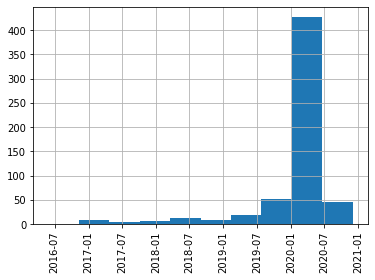

In [73]:
df1.Last_seen.hist(xrot=90)
plt.show()

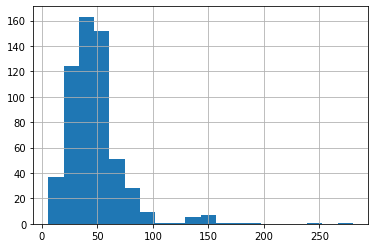

In [74]:
df1.Price.hist(bins=20)

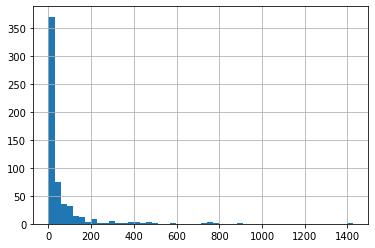

In [75]:
df1.Nb_evals.hist(bins=50)

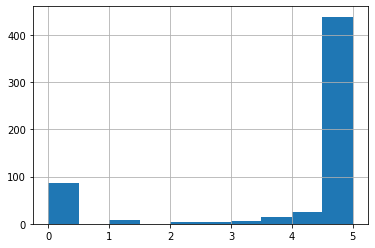

In [76]:
df1.Stars.hist()

# Filtering 

### 1. Condition :
- 1 = satisfaisant
- 2 = bon état
- 3 = tres bon etat
- 4 = neuf
- 5 = neuf avec etiquette

In [6]:
dict_cond={'satisfaisant': 1, 'bon etat':2, 'tres bon etat':3, 'neuf':4, 'neuf avec etiquette':5 }
df1['Condition_cat']=df1.Condition.apply(lambda x: dict_cond[x])

In [7]:
df1.Condition_cat.head()

0    5
1    3
2    3
3    4
4    5
Name: Condition_cat, dtype: int64

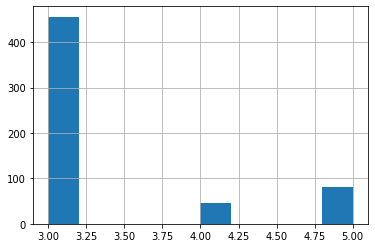

In [9]:
df1.Condition_cat.hist()
plt.show()

#### Price according to Condition
- we will study the price distribution for each category
- then define a reasonable price range for each category :


1. if the price is too low, it is very likely that the product is a fake

In [10]:
Price_stats=df1.groupby('Condition_cat').agg({'Price':['mean','median',pd.Series.mode,pd.Series.std]})

In [11]:
Price_stats.columns=Price_stats.columns.droplevel(0)

In [12]:
Price_stats.rename({'mean':'Mean', 'median':'Median','mode':'Modes','std':'Standard_dev'}, axis=1, inplace=True)

In [13]:
Price_stats

,Mean,Median,Modes,Standard_dev
Condition_cat,,,,
3,41.087719,40.0,40.0,22.569307
4,64.380217,60.0,70.0,25.551934
5,78.061605,69.0,60.0,34.869480


- We need to define a cut off price for each condition.
- As a starting point that could be refined later, we will take $cutoff=mean - std$

In [14]:
Price_stats['Price_cutoff']=Price_stats.apply(lambda row: row['Mean']-row['Standard_dev'], axis=1)

In [15]:
Price_stats

,Mean,Median,Modes,Standard_dev,Price_cutoff
Condition_cat,,,,,
3,41.087719,40.0,40.0,22.569307,18.518413
4,64.380217,60.0,70.0,25.551934,38.828283
5,78.061605,69.0,60.0,34.869480,43.192125


-  we exclude prices that are lower than the cutoff for the category

In [16]:
df1_filter=df1[df1[['Price','Condition_cat']].apply(lambda row: row.Price > Price_stats.Price_cutoff[row.Condition_cat], axis=1)].copy()

In [17]:
df1_filter.shape

(535, 40)

2. we don't want to spend too much money for a second hand product

- for each Condition, we separate the prices into 5 bins and give a score that is maximum for lower price and minimum for the highest prices

In [18]:
scores=list(range(5,0,-1))
scores

[5, 4, 3, 2, 1]

In [19]:
data_filter=pd.DataFrame()
for cat in df1_filter.Condition_cat.unique():
    df_cat=df1_filter[df1_filter.Condition_cat==cat].copy()
    df_cat['score']=pd.qcut(df_cat.Price,5, labels=scores, duplicates='drop')
    data_filter=data_filter.append(df_cat)
data_filter.shape

(535, 41)

In [ ]:
#####################################################################################
# to see the price intervals corresponding to each score for each condition category:

In [25]:
df_cat3=df1_filter[df1_filter.Condition_cat==3].copy().sort_values(by=['Price'], ascending=True)
df_cat4=df1_filter[df1_filter.Condition_cat==4].copy().sort_values(by=['Price'], ascending=True)
df_cat5=df1_filter[df1_filter.Condition_cat==5].copy().sort_values(by=['Price'], ascending=True)

In [24]:
pd.qcut(df_cat3.Price,5, duplicates='drop').unique()

[(18.999, 30.0], (30.0, 39.0], (39.0, 45.0], (45.0, 55.0], (55.0, 280.0]]
Categories (5, interval[float64]): [(18.999, 30.0] < (30.0, 39.0] < (39.0, 45.0] < (45.0, 55.0] < (55.0, 280.0]]

In [26]:
pd.qcut(df_cat4.Price,5, duplicates='drop').unique()

[(41.999, 50.0], (50.0, 60.0], (60.0, 70.0], (70.0, 80.0], (80.0, 150.0]]
Categories (5, interval[float64]): [(41.999, 50.0] < (50.0, 60.0] < (60.0, 70.0] < (70.0, 80.0] < (80.0, 150.0]]

In [27]:
pd.qcut(df_cat5.Price,5, duplicates='drop').unique()

[(47.999, 59.9], (59.9, 65.0], (65.0, 74.936], (74.936, 90.0], (90.0, 190.0]]
Categories (5, interval[float64]): [(47.999, 59.9] < (59.9, 65.0] < (65.0, 74.936] < (74.936, 90.0] < (90.0, 190.0]]

In [ ]:
#####################################################################################

In [90]:
data_filter.head()

,Url,Brand,Size,Condition,Colors,Views,Interested,Uploaded,Last_seen,Price,...,color_creme,color_jaune,color_bleu_clair,color_bleu,color_multicolore,color_vert_fonce,color_marron,color_vert,Condition_cat,score
0,https://www.vinted.fr/femmes/baskets-baskets/3...,Adidas,38,neuf avec etiquette,"[noir, blanc]",42,0,2020-01-16 15:49:00,2020-01-16 15:44:00,179.0,...,0,0,0,0,0,0,0,0,5,1
4,https://www.vinted.fr/femmes/baskets-baskets/3...,Adidas,38,neuf avec etiquette,"[rose, blanc]",607,15,2020-10-01 11:28:00,2020-01-16 16:27:00,48.0,...,0,0,0,0,0,0,0,0,5,5
8,https://www.vinted.fr/femmes/baskets-baskets/3...,Adidas,38,neuf avec etiquette,"[blanc, bordeaux]",382,6,2020-01-15 12:39:00,2020-01-16 16:39:00,75.0,...,0,0,0,0,0,0,0,0,5,2
9,https://www.vinted.fr/femmes/baskets-baskets/3...,Adidas,38,neuf avec etiquette,"[gris, blanc]",23,4,2020-01-16 09:06:00,2020-01-16 15:02:00,60.0,...,0,0,0,0,0,0,0,0,5,4
12,https://www.vinted.fr/femmes/baskets-baskets/3...,Adidas,38,neuf avec etiquette,"[rose, blanc]",10,1,2020-01-16 12:55:00,2020-01-16 16:20:00,60.0,...,0,0,0,0,0,0,0,0,5,4


# 2. Last seen
- to avoid a cancellation of the sell because the seller did not send the product, we select the products that are sold by a seller that did connect on Vinted during the past month

In [29]:
#data_filter.Last_seen = pd.to_datetime(data_filter.Last_seen)

In [30]:
from datetime import datetime, timedelta
data_filter=data_filter[data_filter.Last_seen > (datetime.now() - timedelta(weeks=4))]

In [31]:
data_filter.shape

(443, 41)

# 3. Nb pictures
- the more pictures the seller posts, the less it is probable that he sells knowingly a counterfeat product
- we only select products with 4 pictures or more (with 4 pictures the probability of showing the brand logo on the soles of the shoes and the QR code in the shoe tongue should be high, allowing to verify if the product is counterfeat)

In [32]:
data_filter=data_filter[data_filter.Nb_pictures>=4]

In [33]:
data_filter.shape

(242, 41)

# 4. Stars
- we want the seller to have a 5 stars evaluation (ensuring no or very few bad evaluation, as this score is an average rounded to the closest 0.5 point)

In [34]:
data_filter=data_filter[data_filter.Stars==5]

In [35]:
data_filter.shape

(161, 41)

# 5. Nb Evaluations
- to avoid fake accounts, we select only sellers with at least 10 evaluations

In [36]:
data_filter=data_filter[data_filter.Nb_evals>=10]

In [37]:
data_filter.shape

(126, 41)

# Selection of the 'best deals'
- selecting the products with the best score (lowest price in its condition)

In [38]:
data_filter=data_filter[data_filter.score==5]

In [39]:
data_filter.shape

(36, 41)

In [60]:
data_filter[['Url','Condition_cat', 'Price', 'Nb_evals', 'Nb_pictures', 'score']]

,Url,Condition_cat,Price,Nb_evals,Nb_pictures,score
3,https://www.vinted.fr/femmes/baskets-baskets/3...,4,50.0,114,4,5
4,https://www.vinted.fr/femmes/baskets-baskets/3...,5,48.0,21,5,5
14,https://www.vinted.fr/femmes/baskets-baskets/3...,4,45.0,21,5,5
20,https://www.vinted.fr/femmes/baskets-baskets/3...,3,24.0,387,4,5
54,https://www.vinted.fr/femmes/baskets-baskets/3...,3,20.0,119,4,5
90,https://www.vinted.fr/femmes/autres-sport/3870...,3,30.0,766,5,5
129,https://www.vinted.fr/femmes/baskets-baskets/3...,4,50.0,113,5,5
130,https://www.vinted.fr/femmes/baskets-baskets/3...,5,58.0,61,5,5
133,https://www.vinted.fr/femmes/baskets-baskets/3...,3,20.0,1425,5,5
138,https://www.vinted.fr/femmes/baskets-baskets/3...,5,59.9,749,5,5


In [61]:
data_filter[['Url','Condition_cat', 'Price', 'Nb_evals', 'Nb_pictures', 'score']].sort_values(by=['Condition_cat','Price'], axis=0, ascending=[False,True]).head(10)

,Url,Condition_cat,Price,Nb_evals,Nb_pictures,score
4,https://www.vinted.fr/femmes/baskets-baskets/3...,5,48.0,21,5,5
445,https://www.vinted.fr/femmes/autres-sport/2236...,5,49.0,206,5,5
140,https://www.vinted.fr/femmes/chuck-taylor-conv...,5,55.0,503,5,5
171,https://www.vinted.fr/femmes/baskets-baskets/3...,5,57.9,749,5,5
130,https://www.vinted.fr/femmes/baskets-baskets/3...,5,58.0,61,5,5
138,https://www.vinted.fr/femmes/baskets-baskets/3...,5,59.9,749,5,5
189,https://www.vinted.fr/femmes/baskets-baskets/3...,5,59.9,725,5,5
14,https://www.vinted.fr/femmes/baskets-baskets/3...,4,45.0,21,5,5
3,https://www.vinted.fr/femmes/baskets-baskets/3...,4,50.0,114,4,5
129,https://www.vinted.fr/femmes/baskets-baskets/3...,4,50.0,113,5,5
